In [1]:
# import neccessary libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data visualization setting

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (15, 8)

In [3]:
# load the dataset using pd

df = pd.read_excel("datasets/Insurance_fraud.xlsx")
df.to_csv("Insurance_fraud.csv", index=False)

In [4]:
# overview of data

print(df.head())
print(df.describe())
print(df.info())
print(df.shape)

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         

In [5]:
# fill the missing values in authorities_contacted with unknown

df['authorities_contacted'] = df['authorities_contacted'].fillna('Unknown')


In [6]:
# re-check for missing values

df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

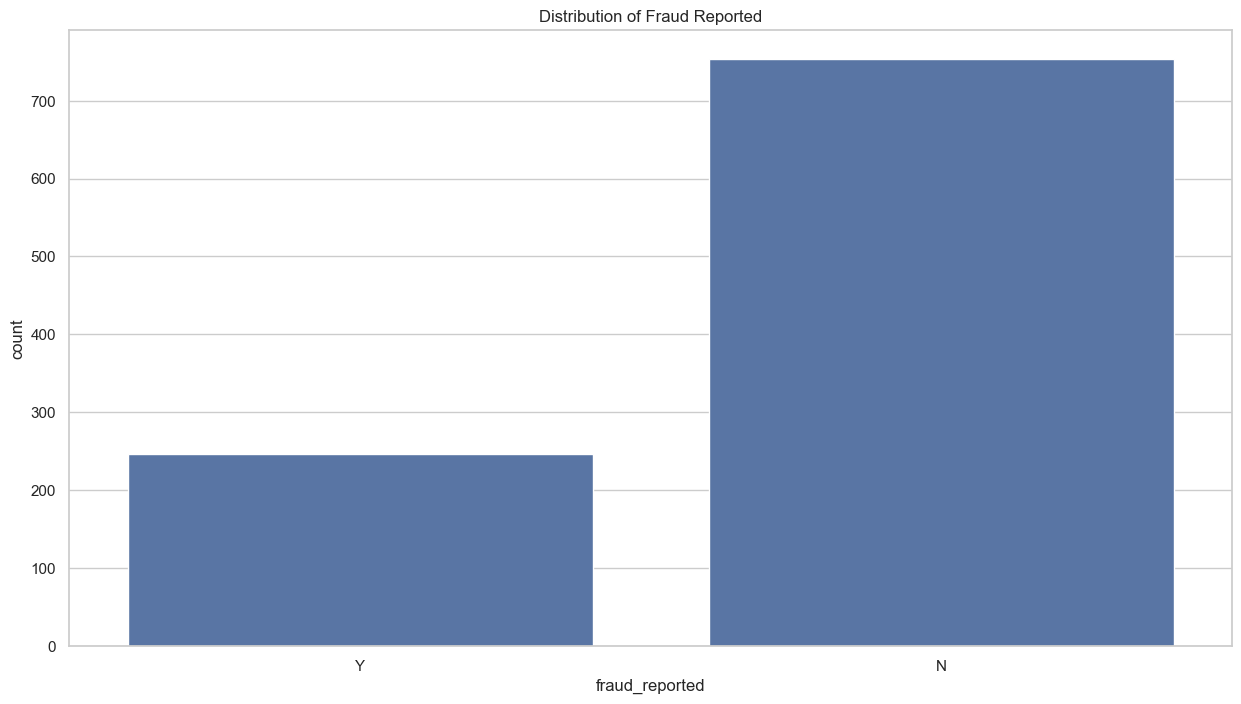

In [7]:
# countplot showing target class distribution

sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported')
plt.show()


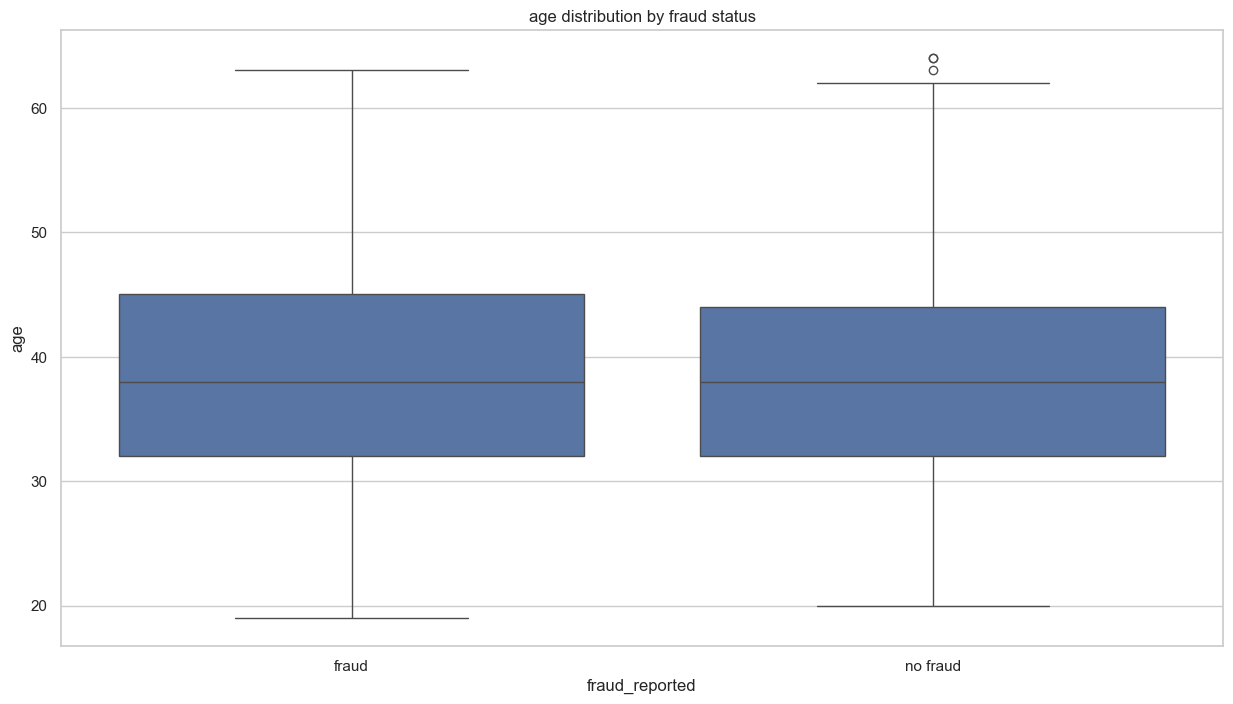

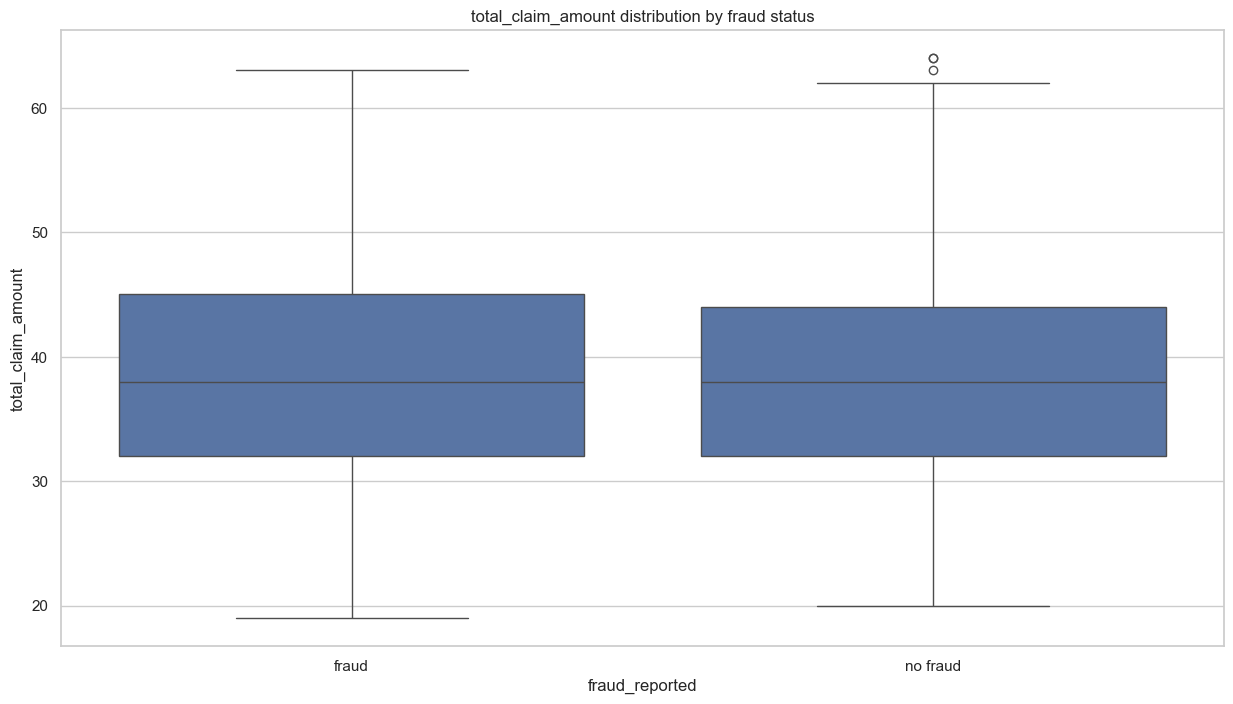

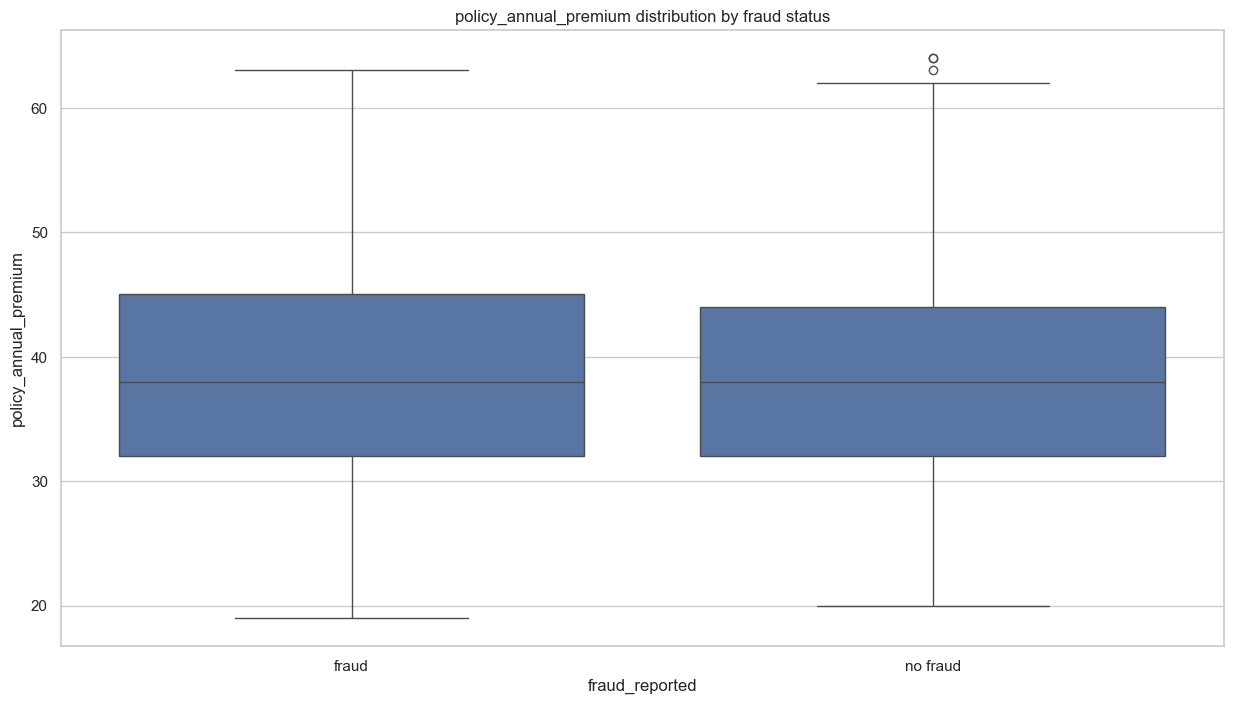

In [8]:
# boxplots showing numerical feature distribution by fraud status

features = ['age', 'total_claim_amount', 'policy_annual_premium']
for feature in features:
    sns.boxplot(x='fraud_reported', y='age', data=df)
    plt.title(f'{feature} distribution by fraud status')
    plt.xticks(['N', 'Y'], ['no fraud', 'fraud'])
    plt.ylabel(f'{feature}')
    plt.show()


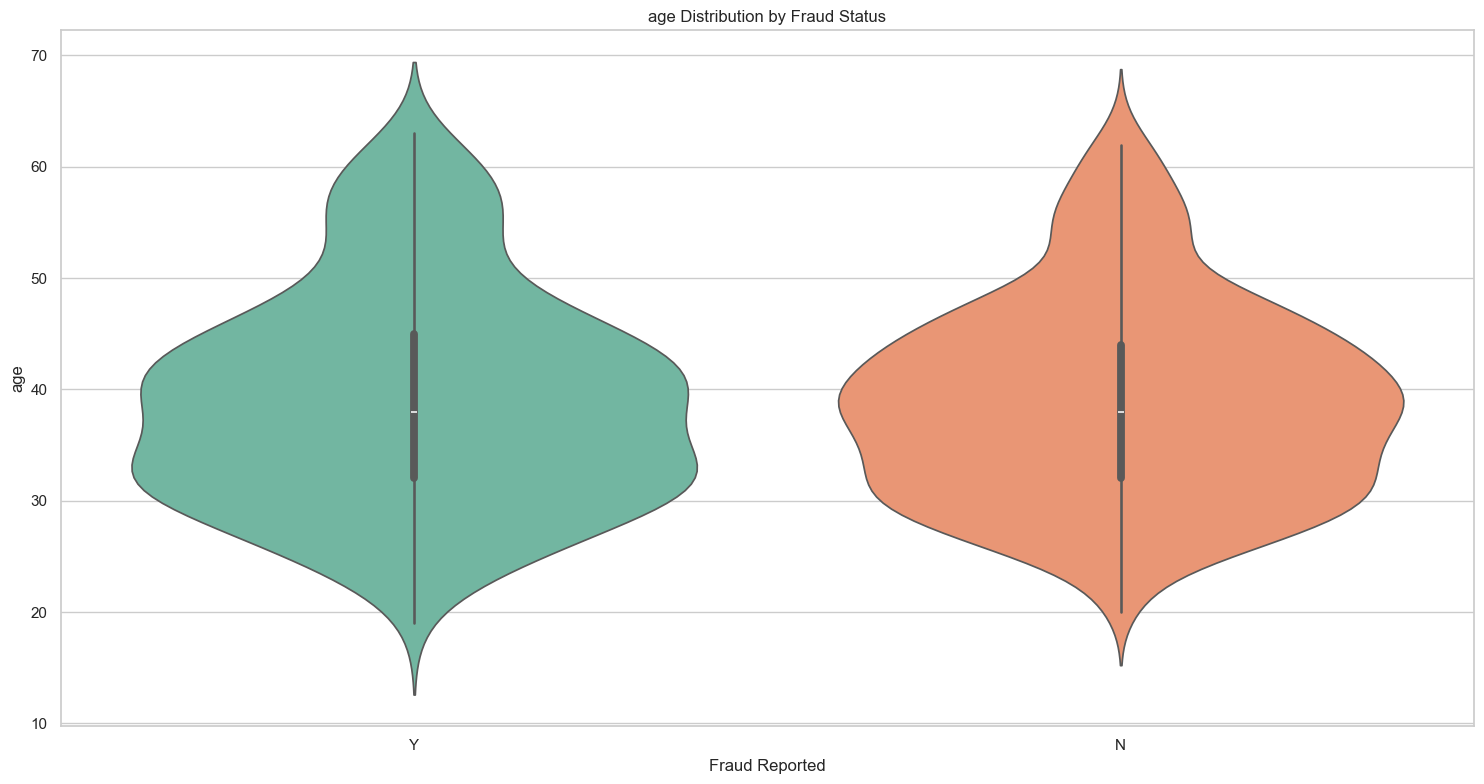

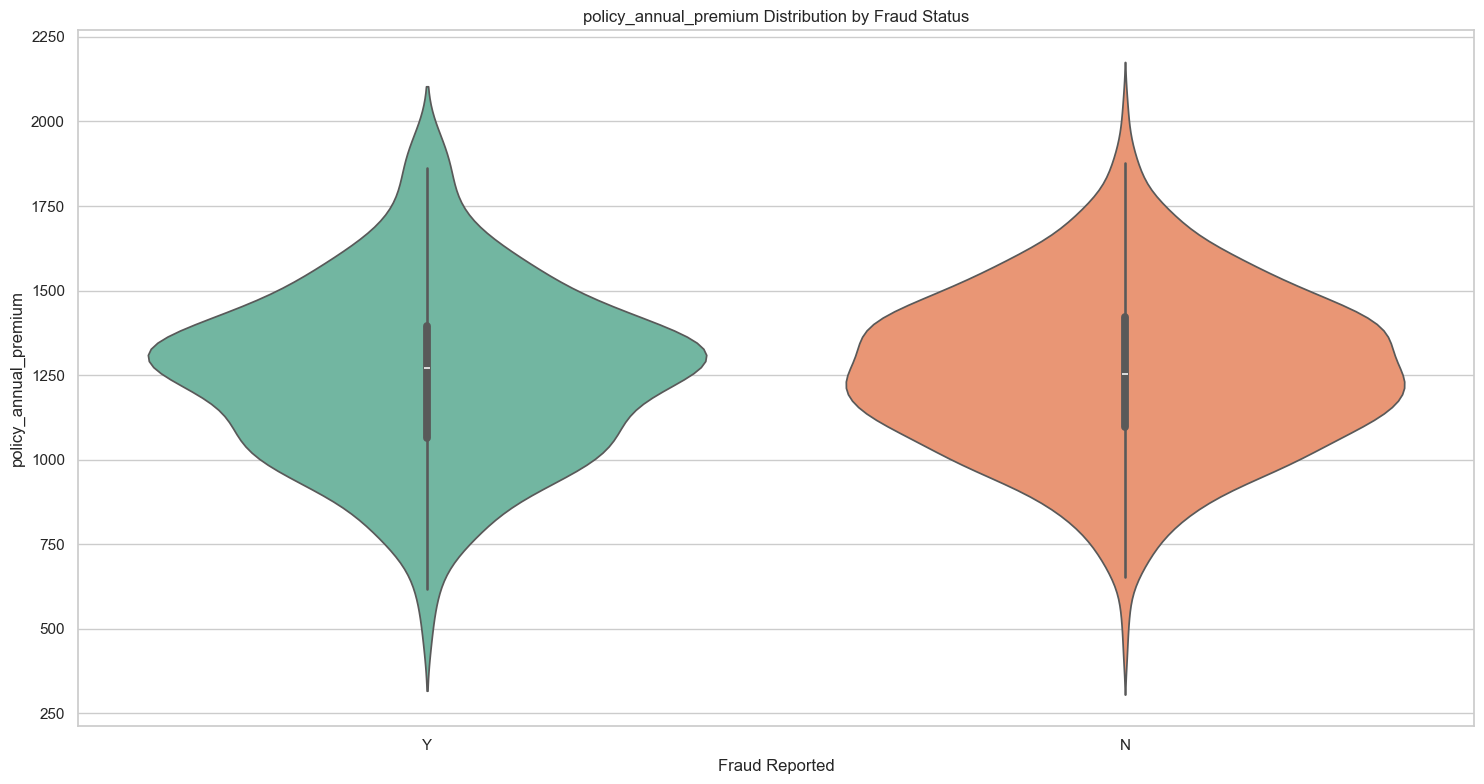

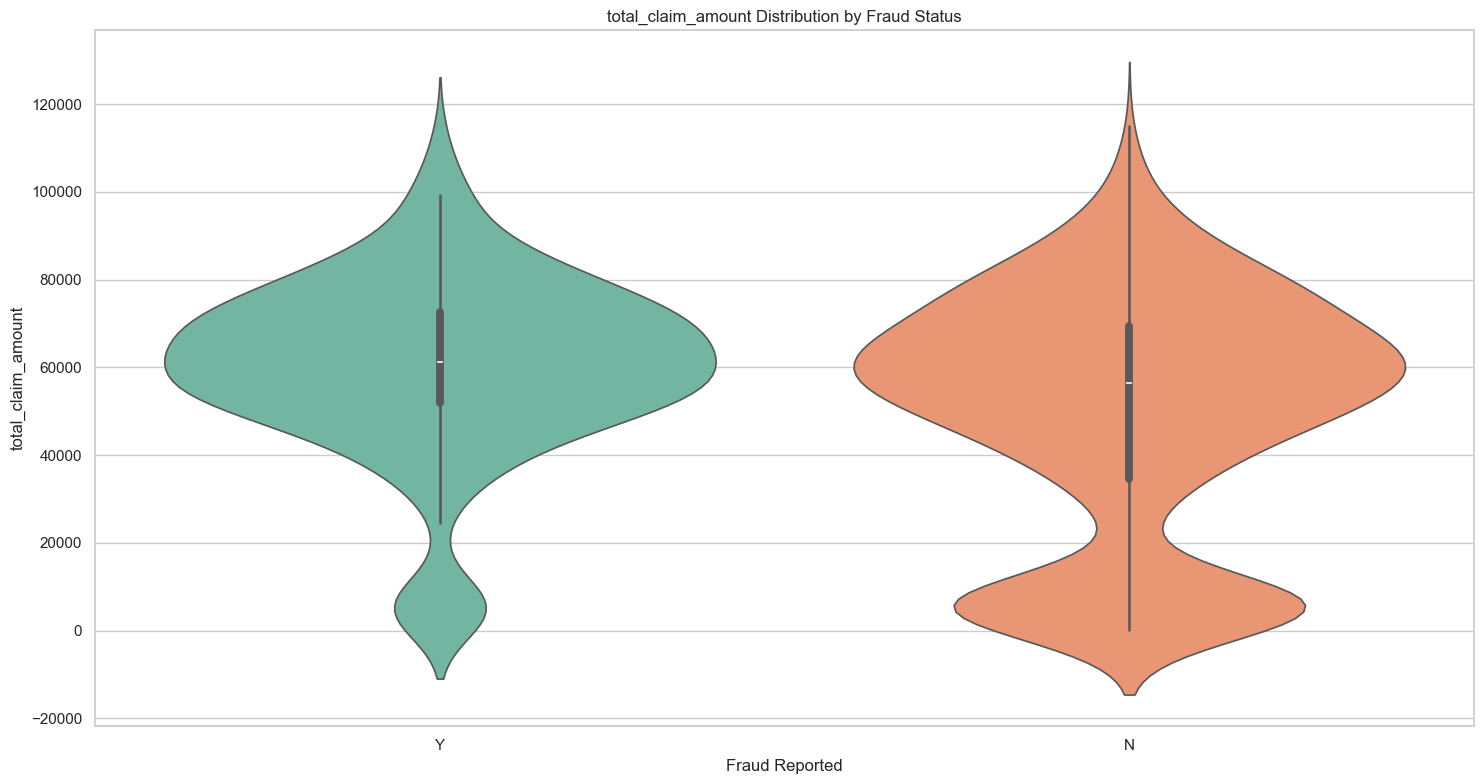

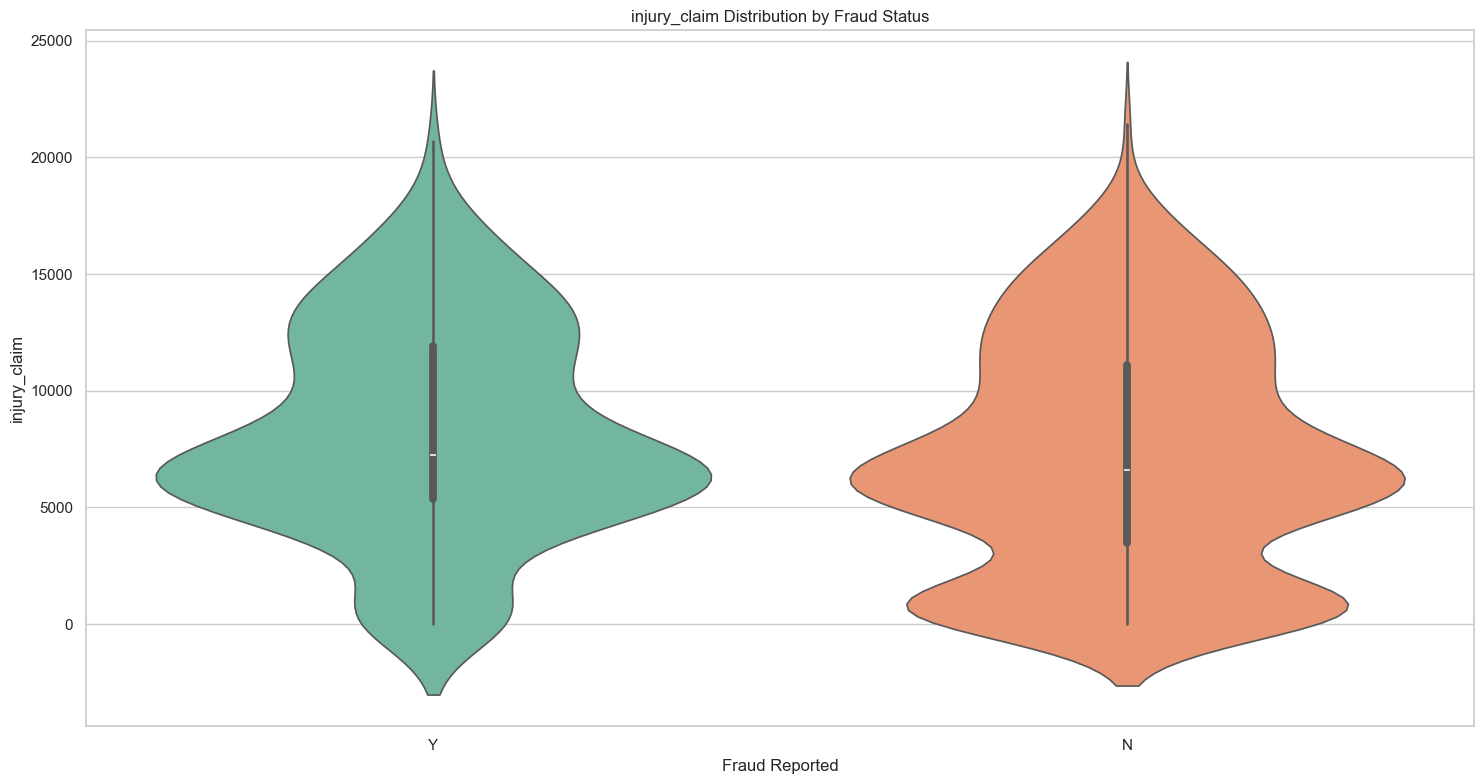

In [9]:
# violin plots comparing key numerical features by fraud status

features = ['age', 'policy_annual_premium', 'total_claim_amount', 'injury_claim']
for feature in features:
    sns.violinplot(x='fraud_reported', 
                   y=feature, 
                   data=df, 
                   hue='fraud_reported',        
                   palette='Set2',
                   legend=False  
                  )
    plt.title(f'{feature} Distribution by Fraud Status')
    plt.xlabel('Fraud Reported')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()
    

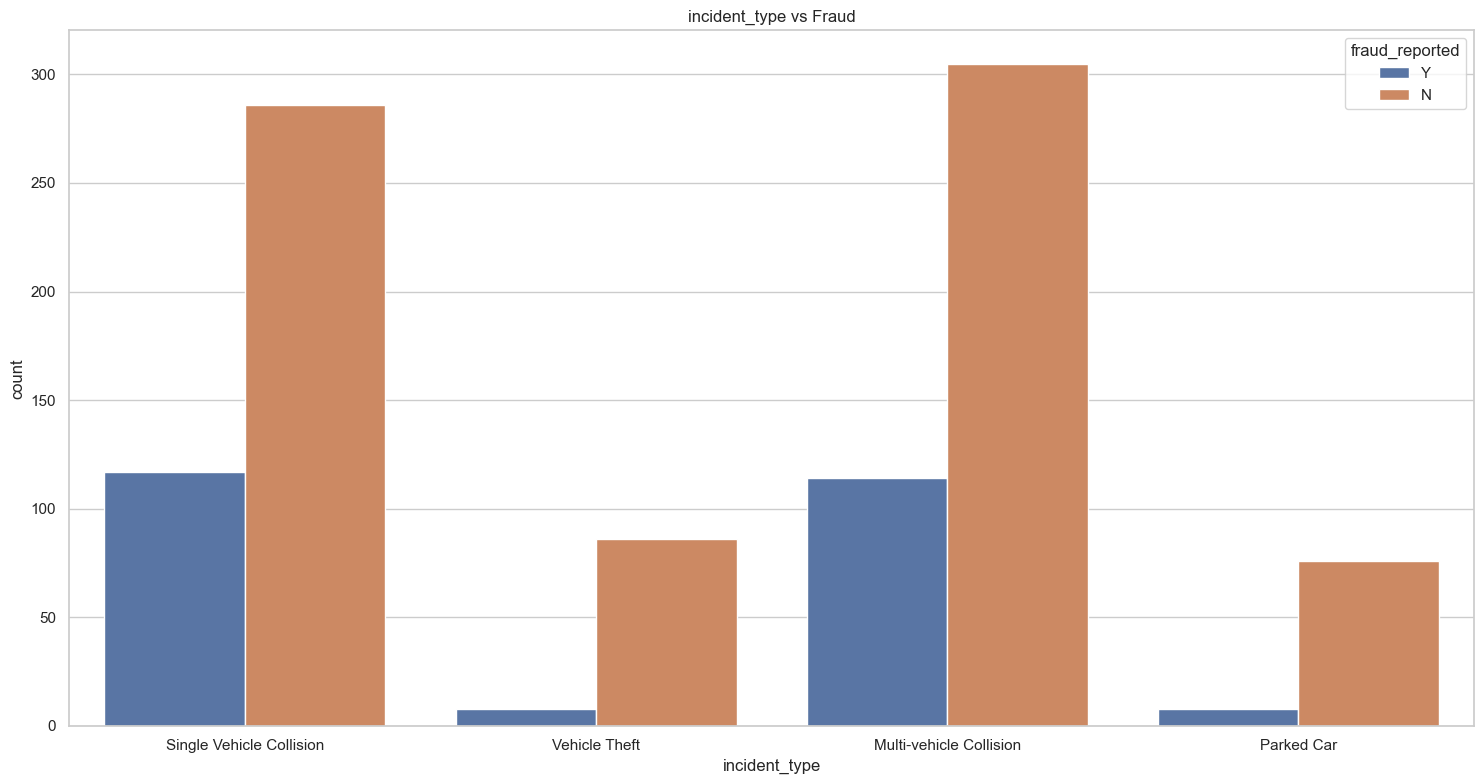

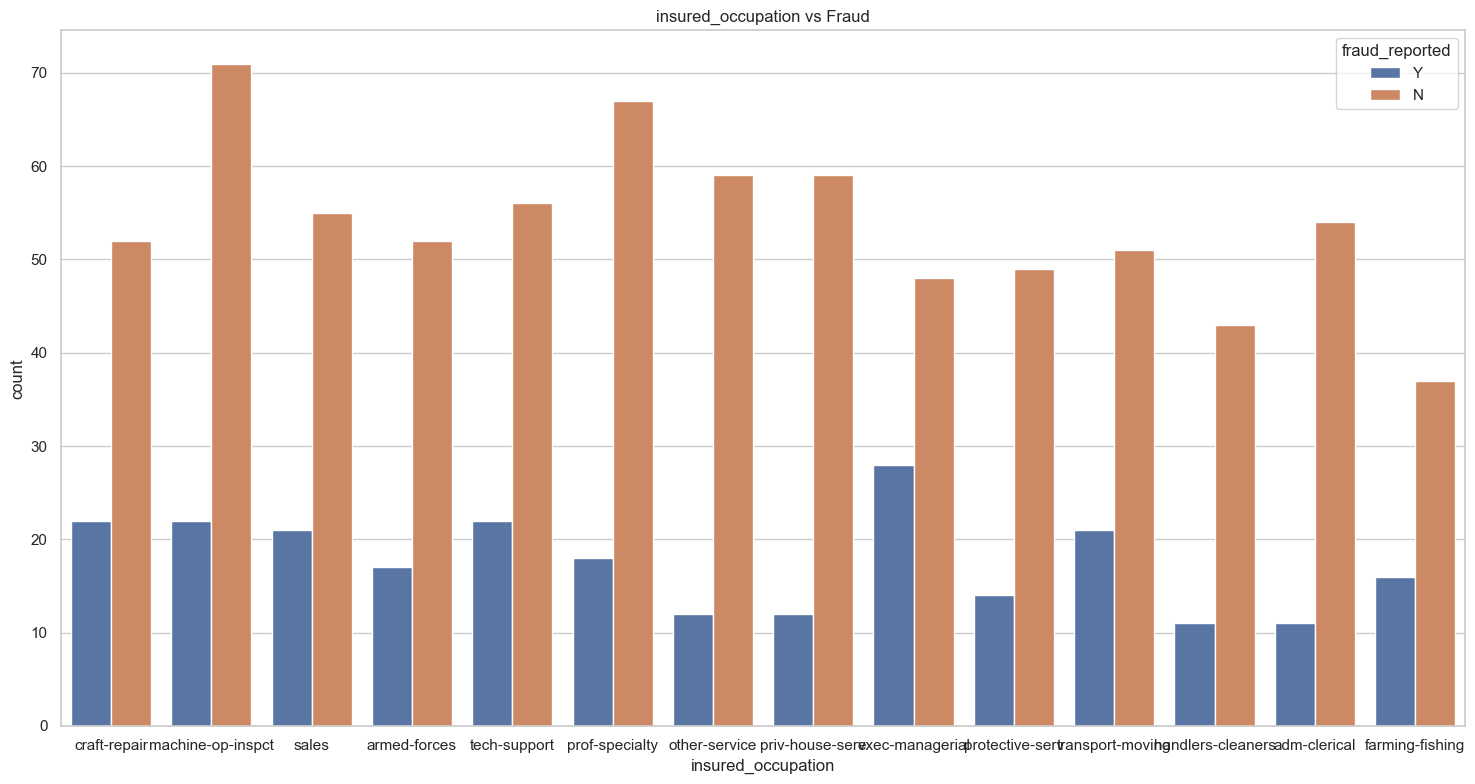

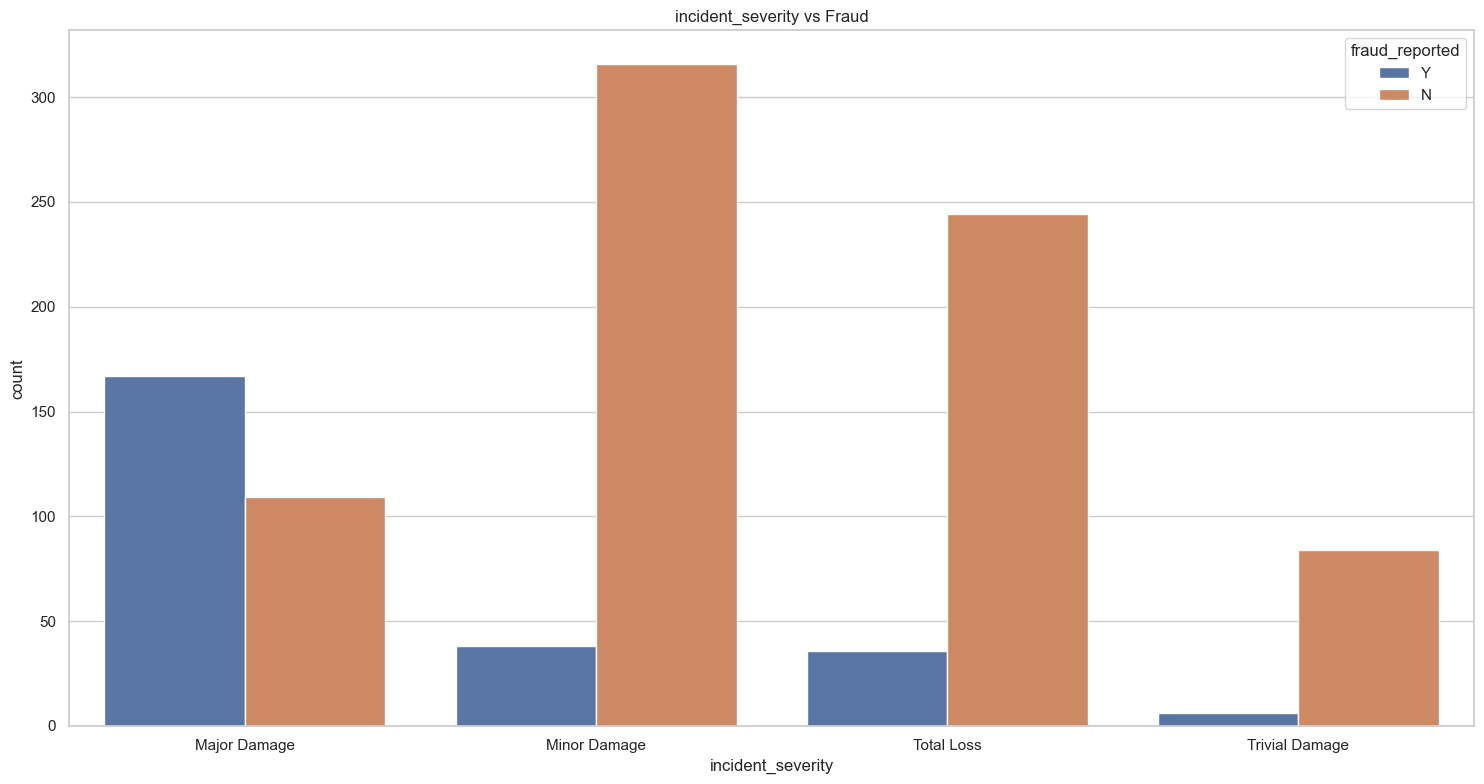

In [10]:
# bar plots showing categorical features vs fraud

features = ['incident_type', 'insured_occupation', 'incident_severity']
for feature in features:
    sns.countplot(x=feature, hue='fraud_reported', data=df)
    plt.title(f'{feature} vs Fraud')
    plt.tight_layout()
    plt.show()
    

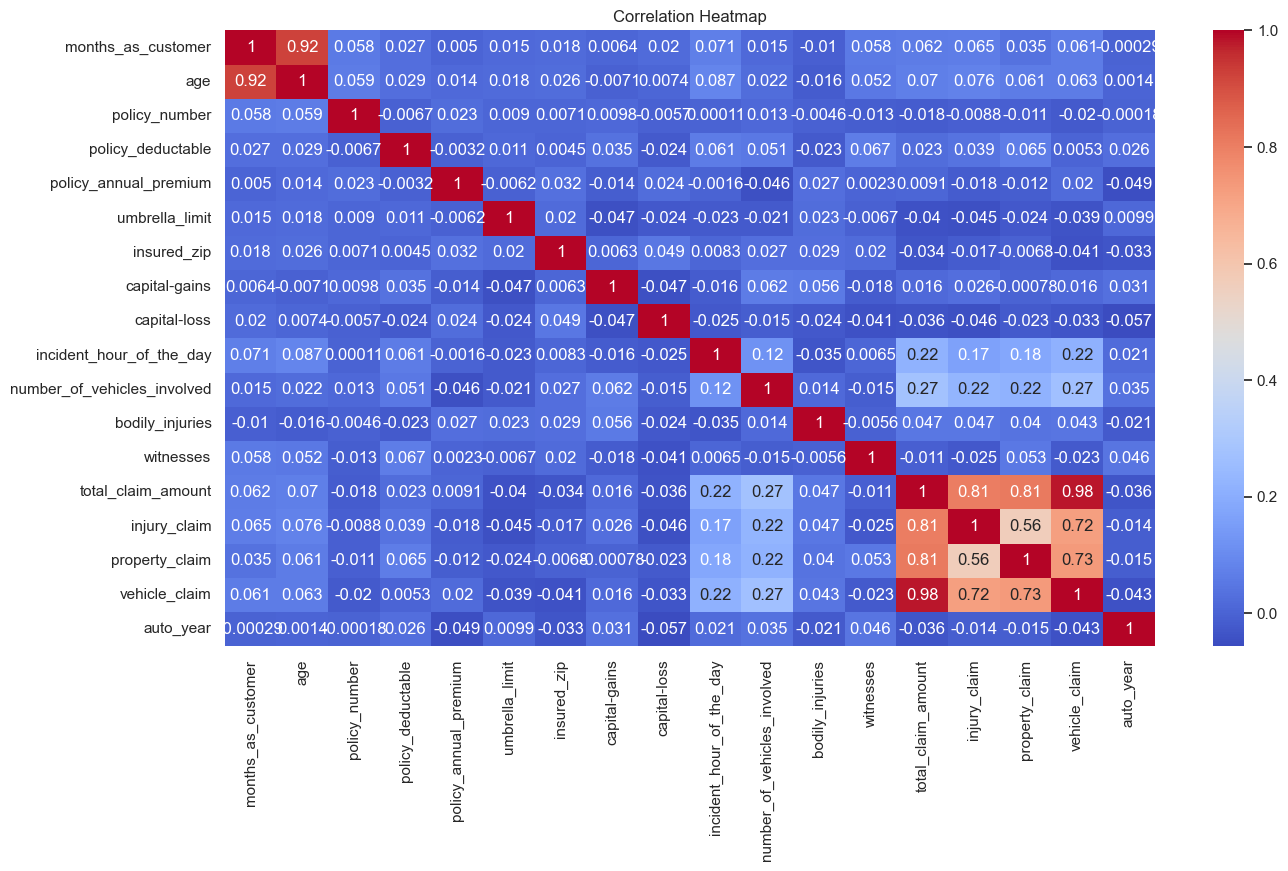

In [11]:
# correlation heatmap

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# seperate the feature and target variables

X = df.drop("fraud_reported", axis=1)
y = df["fraud_reported"]

In [13]:
# split dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
# binary encoding using map

df['fraud_reported'] = df['fraud_reported'].map({'N': 0, 'Y': 1})

df['property_damage'] = df['property_damage'].map({'NO': 0, 'YES': 1})

df['police_report_available'] = df['police_report_available'].replace('?', 'Unknown')
df['police_report_available'] = df['police_report_available'].fillna('Unknown')
df['police_report_available'] = df['police_report_available'].map({'NO': 0, 'YES': 1, 'Unknown': 2})

df['insured_sex'] = df['insured_sex'].map({'FEMALE': 0, 'MALE': 1})

In [15]:
# encode date/datetime features


In [16]:
# ensure the columns are datetime dtype

df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [17]:
# extract components from incident_date

df['incident_month'] = df['incident_date'].dt.month
df['incident_weekday'] = df['incident_date'].dt.weekday

In [18]:
# extract components from policy_bind_date

df['policy_tenure_days'] = (df['incident_date'] - df['policy_bind_date']).dt.days
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df = df.drop(columns=['incident_date', 'policy_bind_date'])

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int64  
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [20]:
# define feature groups

numerical_features = [
    'months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
    'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
    'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim'
]

ordinal_features = ['insured_education_level']
ordinal_categories = [['High School', 'Associate', 'College', 'Masters', 'JD', 'MD', 'PhD']]

onehot_features = [
    'policy_state', 'policy_csl', 'insured_sex', 'insured_occupation',
    'insured_hobbies', 'insured_relationship', 'incident_type',
    'collision_type', 'incident_severity', 'authorities_contacted',
    'incident_state', 'incident_city', 'auto_make', 'auto_model'
]

In [21]:
# define transformers

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])


In [22]:
# convert values to string before one-hot encoding

from sklearn.preprocessing import FunctionTransformer

string_converter = FunctionTransformer(lambda x: x.astype(str))

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_string', string_converter),  # <--- Convert all values to string
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [23]:
# combine into column transformer

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('ord', ordinal_transformer, ordinal_features),
    ('cat', onehot_transformer, onehot_features)
])

In [28]:
# build the pipeline

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, class_weight='balanced'))
])


In [29]:
# train the pipeline on training data

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['months_as_customer', 'age',
                                                   'policy_deductable',
                                                   'policy_annual_premium',
                                                   'umbrella_limit',
                                                   'capital-gains',
                                                   'capital-loss',
                                                   'incident_hour_of_the_day',
                                                   'number_of_vehicles_involved',
                                                   'bodily_inj...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['policy_state', 'policy_csl',
                                                   'insured_sex',
                                                   'insured_occupation',
                                                   'insured_hobbies',
                                                   'insured_relationship',
                                                   'incident_type',
                                                   'collision_type',
                                                   'incident_severity',
                                                   'authorities_contacted',
                                                   'incident_state',
                                                   'incident_city', 'auto_make',
                                                   'auto_model'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [30]:
# evaluate the test set

y_pred = pipeline.predict(X_test)
y_pred


array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y',
       'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N

In [31]:
# evaluate model accuracy

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.73
Confusion Matrix:
 [[133  10]
 [ 44  13]]
Classification Report:
               precision    recall  f1-score   support

           N       0.75      0.93      0.83       143
           Y       0.57      0.23      0.33        57

    accuracy                           0.73       200
   macro avg       0.66      0.58      0.58       200
weighted avg       0.70      0.73      0.69       200



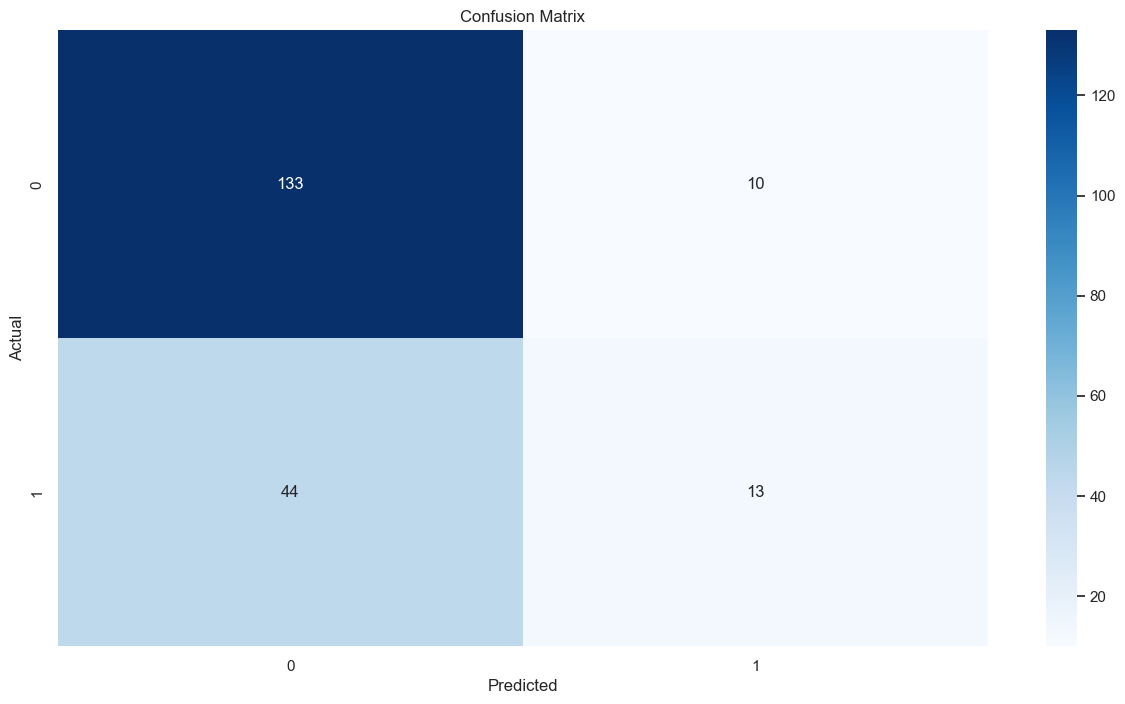

In [33]:
# confusion matrix heatmap

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

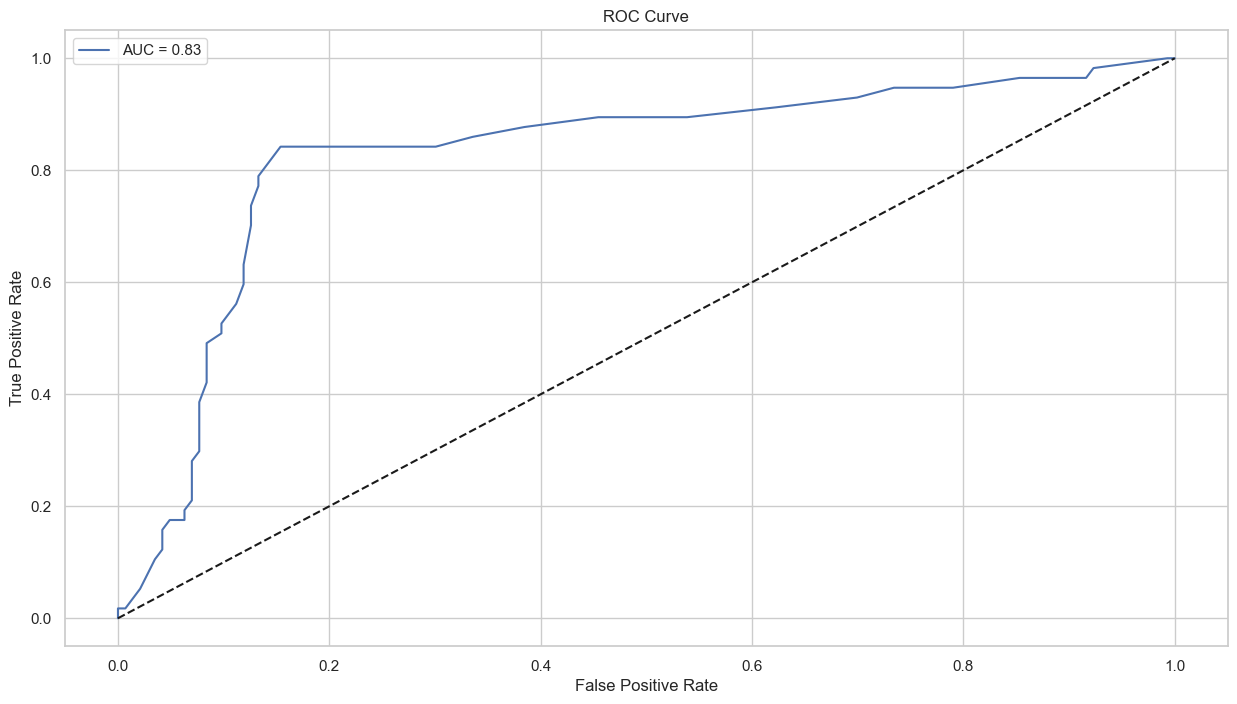

In [34]:
# ROC curve

from sklearn.metrics import roc_curve, auc

y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test.map({'N': 0, 'Y': 1}), y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [36]:
# feature importance

In [37]:
# extract the transformers

ct = pipeline.named_steps['preprocessor']
transformers = ct.transformers_


In [41]:
# initialize empty list for all feature names

def get_feature_names_from_column_transformer(ct):
    output_features = []

    for name, transformer, columns in ct.transformers_:
        if transformer == 'drop':
            continue

        if isinstance(transformer, Pipeline):
            last_step = transformer.steps[-1][1]
        else:
            last_step = transformer

        try:
            names = last_step.get_feature_names_out(columns)
        except:
            names = columns

        output_features.extend(names)

    return output_features

feature_names = get_feature_names_from_column_transformer(pipeline.named_steps['preprocessor'])

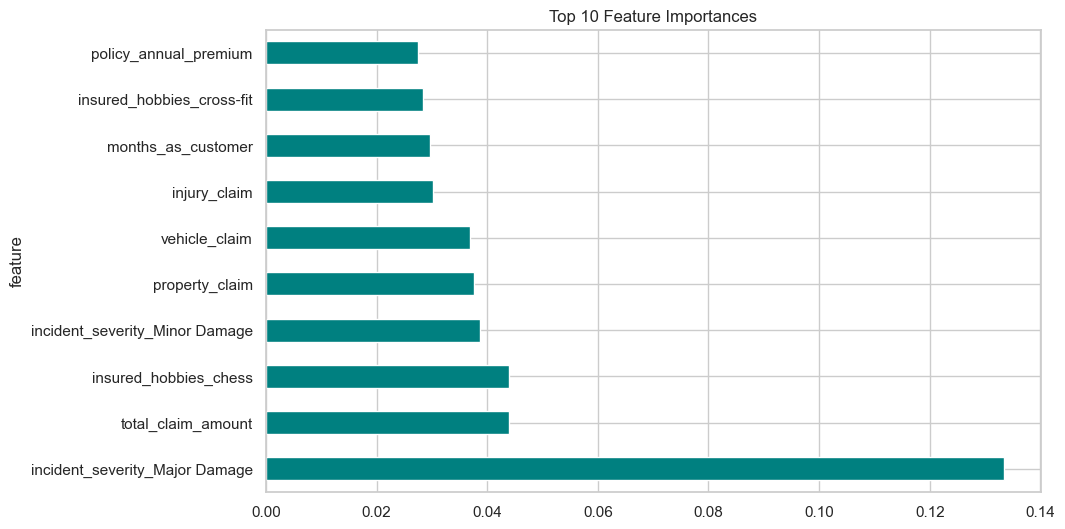

In [43]:
# sort and plot top 10

importances = pipeline.named_steps['clf'].feature_importances_

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

importance_df.sort_values(by='importance', ascending=False).head(10).plot(
    kind='barh', x='feature', y='importance',
    legend=False, figsize=(10, 6), color='teal'
)
plt.title('Top 10 Feature Importances')
plt.show()